# USA’s unique gun violence problem -  Individual Project

### Individual Project First Version

In [1]:
#Important libraries to be imported before code execution
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus


import matplotlib.pyplot as plt

from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot

#Bokeh library imports
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.layouts import layout
from bokeh.layouts import widgetbox
from bokeh.embed import file_html
from bokeh.io import output_notebook
from bokeh.models import Text
from bokeh.models import Plot
from bokeh.models import Slider
from bokeh.models import Circle
from bokeh.models import Range1d
from bokeh.models import CustomJS
from bokeh.models import HoverTool
from bokeh.models import LinearAxis
from bokeh.models import ColumnDataSource
from bokeh.models import SingleIntervalTicker

# testing
import unittest

Populating the interactive namespace from numpy and matplotlib


# Dataset Description 

The dataset that is df which is from the source "unodc small arms survey via the guardian" about Gun violence in the USA.

<ul>
<li> <b> df</b> is Dataviz_Graphs.csv a dataset of small arms survey data in the USA. </li>
<li> <b> df1</b> is a dataset Statistical_Annex_Table.csv ; <li>Reference:: https://ajph.aphapublications.org/doi/abs/10.2105/AJPH.2015.302749 ,
https://data.world/azel/gun-deaths-in-america ,
https://library.stanford.edu/projects/mass-shootings-america ,
https://www.atf.gov/about/firearms-trace-data-2015 ,
https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm ,
http://crowdsourcing-class.org/assignment9.html ,
https://www.atf.gov/resource-center/docs/163524-alatfwebsite15pdf/download, https://plot.ly/python/heatmaps/.</li>
<li> <b> df3 </b>  <b> </b> is dataset for the third graph using a larger dataset <b>  </b>.
<li> <b> df2 </b>  <b> </b> is dataset for the third graph using teh dataset df2 which is smaller and has been used for <b>Graph 2 <b></b>.
</ul>

The columns in <b> df </b> are: 
<ol>
<li> State : State in USA, String </li>
<li> Country: Country wise use of firearms , Numeric </li>

<li> Firearm per 1 million pop: % of firarms in population, Numeric </li>
<li> Firearm Data: Raw data for firearms, Numeric </li>
<li> Abbreviations for Countries: String </li>

Pretty much columns are same in other tables with a slight addition of some columns.
</ol>

# Data Preparation and Cleaning

## Country Wise Data

In [3]:
df = pd.read_csv('Dataviz_Graphs.csv')

In [4]:
df1 = pd.read_csv('Statistical_Annex_Table.csv')

In [5]:
df1

,HDI rank,Country,hdi1,Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,1,Norway,0.949,81.7,17.7,12.7,"67,614",5,1
1,2,Australia,0.939,82.5,20.4,13.2,"42,822",19,3
2,2,Switzerland,0.939,83.1,16.0,13.4,"56,364",7,2
3,4,Germany,0.926,81.1,17.1,13.2,"45,000",13,4
4,5,Denmark,0.925,80.4,19.2,12.7,"44,519",13,6
5,5,Singapore,0.925,83.2,15.4,11.6,"78,162",-3,4
6,7,Netherlands,0.924,81.7,18.1,11.9,"46,326",8,6
7,8,Ireland,0.923,81.1,18.6,12.3,"43,798",11,8
8,9,Iceland,0.921,82.7,19.0,12.2,"37,065",20,9
9,10,Canada,0.920,82.2,16.3,13.1,"42,582",12,9


In [6]:
#For easy access, changing column names
df1.rename(columns={'hdi1': 'hdi'}, inplace=True)

In [7]:
#df1 = df1.rename(columns={ 'Human Development Index (HDI)': 'hdi1'})
type(df1)


pandas.core.frame.DataFrame

In [8]:
# drop empties
df = df.dropna()

In [9]:
df['HDI'] = ''

In [10]:
df1.to_dict('series')

{'Country': 0                                Norway
 1                             Australia
 2                           Switzerland
 3                               Germany
 4                               Denmark
 5                             Singapore
 6                           Netherlands
 7                               Ireland
 8                               Iceland
 9                                Canada
 10                        United States
 11               Hong Kong, China (SAR)
 12                          New Zealand
 13                               Sweden
 14                        Liechtenstein
 15                       United Kingdom
 16                                Japan
 17                  Korea (Republic of)
 18                               Israel
 19                           Luxembourg
 20                               France
 21                              Belgium
 22                              Finland
 23                              Austria
 24  

#Adding the HDI ; Human Development Index column to the data for getting the list of developed countries.

In [11]:
dfcopy = df1.copy()

In [12]:
dfdict = df1.set_index('Country')['hdi'].to_dict()

In [13]:
df['HDI'] = df['Country'].map(dfdict)

In [14]:
df

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,HDI
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0,0.764
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0,0.745
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0,0.827
5,Armenia,AM,CTS,13.0,9.0,0.29,52.0,12.5,380000.0,0.743
6,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,0.939
7,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,0.893
8,Azerbaijan,AZ,CTS,6.5,11.0,0.12,115.0,3.5,290000.0,0.759
9,Bahamas,BS,CTS,61.2,52.0,15.37,98.0,5.3,17000.0,0.792
10,Bahrain,BH,CTS,0.0,0.0,0.00,18.0,24.8,180000.0,0.824
11,Bangladesh,BD,National police,43.6,1456.0,1.12,169.0,0.5,700000.0,0.579


In [15]:
df.sort_values(by='HDI', ascending=0, inplace = True)


In [16]:
dfslice = df[0:19]


In [17]:
#dfmerge = dfmerge.dropna()
# drop empties
 

# Factorplot


C:\Users\Manisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



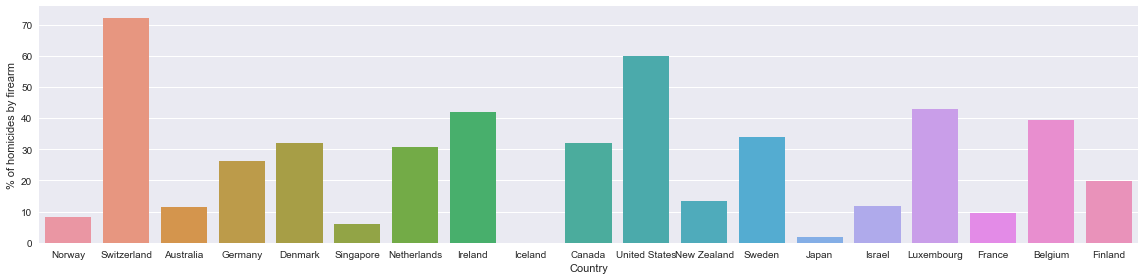

In [18]:
sns.factorplot(x='Country', y='% of homicides by firearm', data=dfslice, aspect=4, kind='bar')

The above plot shows the clear numbers and how USA has larger % of homicides compared to Norway and Germany as stated in the Article Graph 1.

# Line Graph: Plot 1

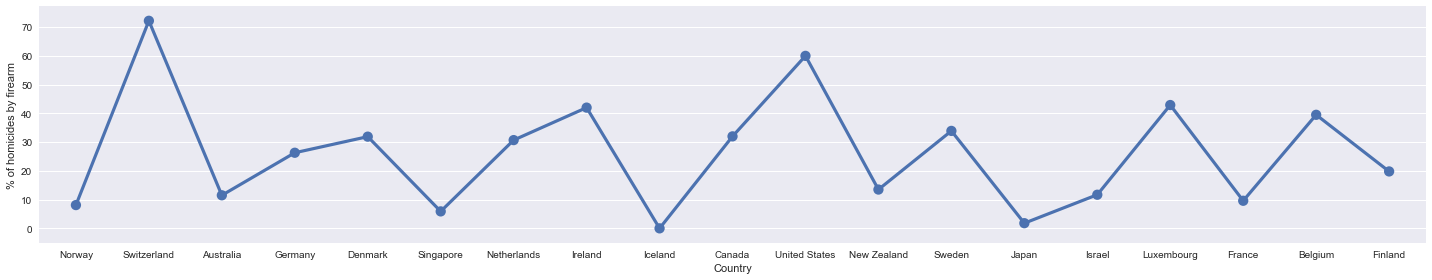

In [19]:
sns.factorplot(x='Country', y='% of homicides by firearm', data=dfslice, aspect=5)

In [20]:
dfslice.head(1)

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,HDI
127,Norway,NO,WHO-HFA,8.1,2.0,0.05,11.0,31.3,1400000.0,0.949


In [21]:
import plotly.plotly as py
import plotly.graph_objs as go

In [22]:

trace0 = go.Bar(
    x=dfslice['Country'],
    y=dfslice['Homicide by firearm rate per 100,000 pop'],
    text=dfslice['% of homicides by firearm'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Homicide Report',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

The graph truely expresses the idea of plot 1 but the other graph in the table was quite not clear and idea shwn by the graph was not eye catchy and easy to interpret. Although, when the graph is measured with other variable measures such as %of Homicides and other variables, if more variables are added it may lead to more beautiful insights.

## Graph2

In [64]:
df2= pd.read_csv('Mass-shootings.csv')

In [65]:
df2

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"May 3, 2018",North Dakota,Grand Forks,1000 block of S 12th St,4,0,NaN
1,"May 2, 2018",Illinois,Chicago,3500 block of W Grenshaw St,1,4,NaN
2,"May 2, 2018",Minnesota,Minneapolis,2400 block of Ogema Place,0,6,NaN
3,"May 2, 2018",New York,Brooklyn,Bristol St,1,4,NaN
4,"May 1, 2018",Louisiana,New Orleans,3200 block of Saint Claude Ave,0,5,NaN
5,"April 30, 2018",Florida,Pompano Beach,4251 N Dixie Hwy,0,4,NaN
6,"April 30, 2018",District of Columbia,Washington,3600 block of New York Ave NE,0,4,NaN
7,"April 29, 2018",Tennessee,Wartburg,519 South Kingston St,0,4,NaN
8,"April 29, 2018",Washington,Seattle (Skyway),12603 Renton Ave S,2,2,NaN
9,"April 29, 2018",North Carolina,Monroe,1500 block of Massey St,1,3,NaN


Adding a column Percent and calculating % of firearm deaths.

In [66]:
df2['e'] = df2.sum(axis=1)

In [67]:
sumshoot = df2['e'].sum()

In [68]:
df2.sort_values(by='e', ascending=0, inplace = True)

In [69]:
df2['percent']= ''

In [70]:
df2['percent'] = (df2.e/sumshoot)*100

In [71]:
df2.sort_values(by='percent', ascending=0, inplace = True)

In [72]:
dfshoot = df2[0:30]

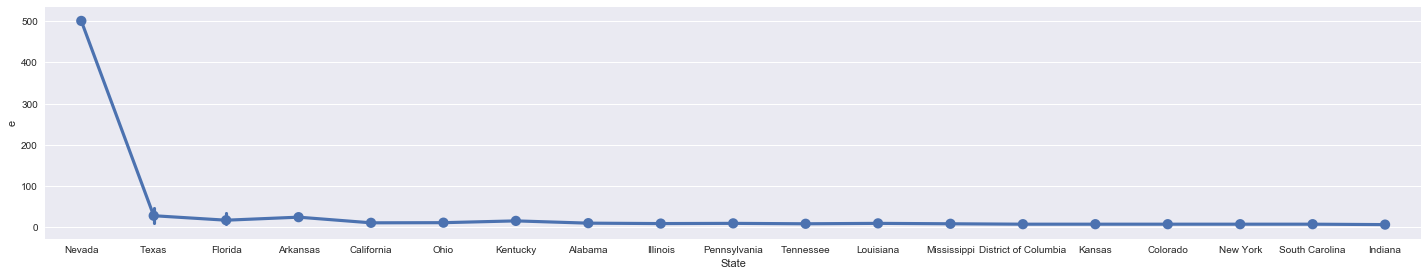

In [73]:
sns.factorplot(x='State', y='e', data=dfshoot, aspect=5)

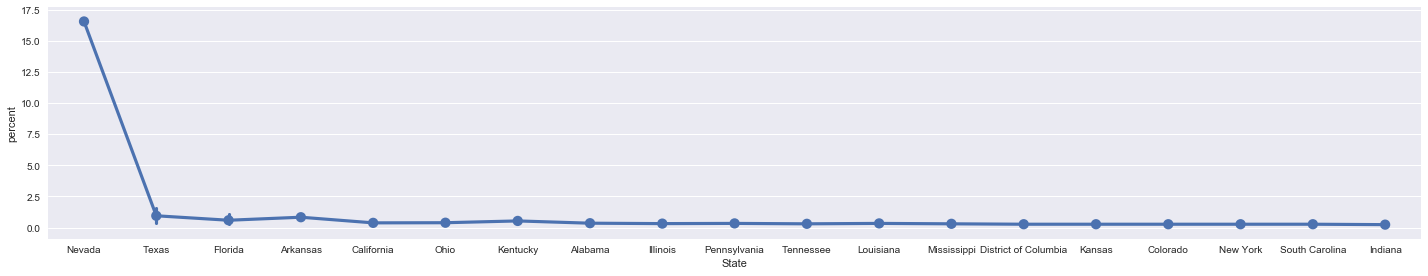

In [74]:
sns.factorplot(x='State', y='percent', data=dfshoot, aspect=5)

In [33]:
trace0 = go.Bar(
    x=dfshoot['State'],
    y=dfshoot['e'],
    text=sumshoot,
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Firearm deaths State Wise in USA',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

I have added the total mass shootings stat (3015) with all the state bar plots. So, that it validates that mass shootings have increased.

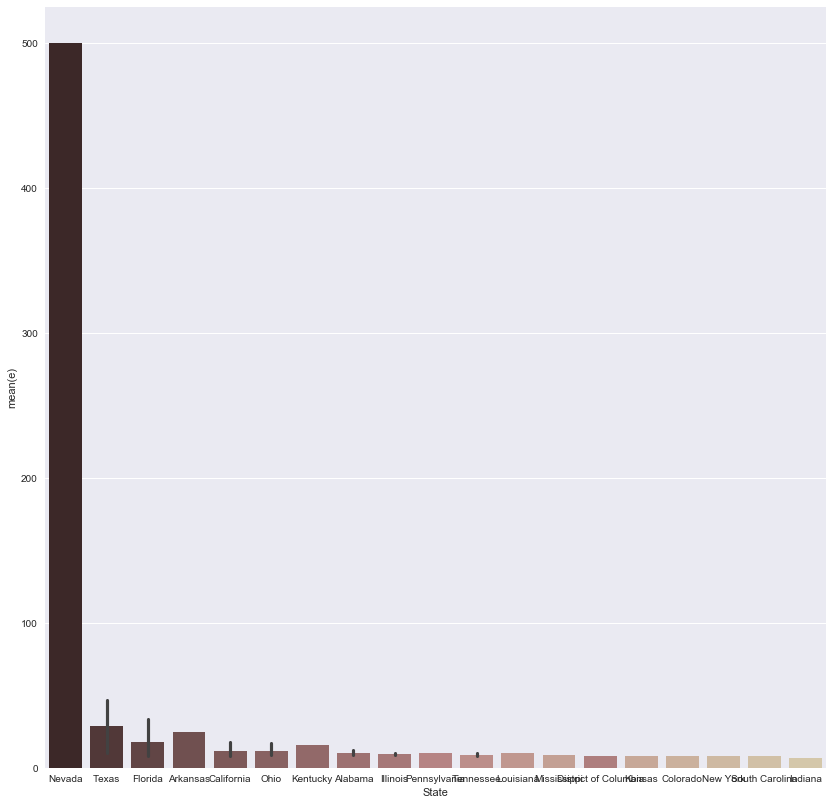

In [34]:
#par(mar=c(15, 3, 3, 1))
pal = sns.color_palette("pink", len(dfshoot))
rank = dfshoot["e"].argsort().argsort() 
sns.set(rc={'figure.figsize':(14,14)})
g=sns.barplot(x='State',y='e',data=dfshoot, palette=np.array(pal[::-1])[rank])
plt.show()

I think if the Graph 3 in the article states mass shootings have increased by certain amount, it should mention the exact number. Though the insight was correct but it was blurry until re-explored. Also, the heatmaps are generally stuffed and lots of information expressed in one space so information details gets hidden. So, I would think a simple line plot would suffice for that.

In [35]:
#Add heatmap 

In [36]:
##Graph 3

# Graph 3

In [376]:
from plotly.offline import init_notebook_mode, iplot
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objs as go
#from wordcloud import WordCloud
#from textblob import TextBlob 

import plotly.plotly as py
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random
import calendar

init_notebook_mode(connected=True)
punc = string.punctuation

In [ ]:
#Recreation

In [77]:
df2= pd.read_csv('Mass-shootings.csv', parse_dates = ['Incident Date'])



In [78]:
df2.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2018-05-03,North Dakota,Grand Forks,1000 block of S 12th St,4,0,NaN
1,2018-05-02,Illinois,Chicago,3500 block of W Grenshaw St,1,4,NaN
2,2018-05-02,Minnesota,Minneapolis,2400 block of Ogema Place,0,6,NaN
3,2018-05-02,New York,Brooklyn,Bristol St,1,4,NaN
4,2018-05-01,Louisiana,New Orleans,3200 block of Saint Claude Ave,0,5,NaN


In [79]:
df2['year'] = df2['Incident Date'].dt.year
df2['loss'] = df2['# Killed'] + df2['# Injured']

In [80]:
from plotly.offline import init_notebook_mode, iplot

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random
import calendar

init_notebook_mode(connected=True)
punc = string.punctuation

In [81]:
statdf = df2.reset_index().groupby(by=['State']).agg({'loss':'sum', 'year':'count'}).rename(columns={'year':'count'})
statdf['State'] = statdf.index

trace1 = go.Bar(
    x=statdf['State'],
    y=statdf['count'],
    name='Count of Incidents',
    marker=dict(color='rgb(255,10,225)'),
    opacity=0.6
)
trace2 = go.Bar(
    x=statdf['State'],
    y=statdf['loss'],
    name='Total Deaths/Loss',
    marker=dict(color='rgb(58,22,225)'),
    opacity=0.6
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'State wise number of Gun Violence Incidents and Total Deaths/Life loss',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [ ]:
#############################################################################################################

In [41]:
states_df = df2['State'].value_counts()

statesdf = pd.DataFrame()
statesdf['State'] = states_df.index
statesdf['counts'] = states_df.values

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesdf['state_code'] = statesdf['State'].apply(lambda x : state_to_code[x])

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesdf['state_code'],
        z = statesdf['counts'],
        locationmode = 'USA-states',
        text = statesdf['State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

layout = dict(
        title = 'State wise number of Gun Violence Incidents',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

The issue I found with this graph is that as the dataset is limited so it shows some blank values for some states. So, for that I used a larger dataset and generated the heatmap and got better visual.
Note : I have placed the figure after Rework Section because it was same information on another dataset. Find it at * below.

Graph 3 has been redesigned to show the above information. We can even hover over it.

# Scope for Rework

In [ ]:
plt.matshow(df.corr())

In [ ]:
a= df.corr()

In [44]:
df3 = pd.read_csv('FIREARMS.csv')

In [45]:
df_map=df3.copy()

us_state_abbrev = {
 'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ':'Arizona',
 'AR':'Arkansas',
 'CA':'California',
 'CO':'Colorado',
 'CT':'Connecticut',
 'DE':'Delaware',
 'DC':'District of Columbia',
 'FL':'Florida',
 'GA':'Georgia',
 'HI':'Hawaii',
'ID':'Idaho',
 'IL':'Illinois',
 'IN':'Indiana',
 'IA':'Iowa',
 'KS':'Kansas',
 'KY':'Kentucky',
 'LA':'Louisiana',
 'ME':'Maine',
 'MD':'Maryland',
 'MA':'Massachusetts',
 'MI':'Michigan',
'MN':'Minnesota',
 'MS':'Mississippi',
 'MO':'Missouri',
 'MT':'Montana',
 'NE':'Nebraska',
 'NV':'Nevada',
 'NH':'New Hampshire',
 'NJ':'New Jersey',
 'NM':'New Mexico',
 'NY':'New York',
 'NC':'North Carolina',
 'ND':'North Dakota',
 'OH':'Ohio',
 'OK':'Oklahoma',
 'OR':'Oregon',
 'PA':'Pennsylvania',
 'RI':'Rhode Island',
 'SC':'South Carolina',
 'SD':'South Dakota',
'TN':'Tennessee',
 'TX':'Texas',
 'UT':'Utah',
 'VT':'Vermont',
 'VA':'Virginia',
 'WA':'Washington',
 'WV':'West Virginia',
 'WI':'Wisconsin',
 'WY':'Wyoming',
}

df_map['State'] = df_map['STATE'].map(us_state_abbrev)

In [46]:
df_map = df_map.drop('URL', axis=1)

In [47]:
df4 = pd.read_csv('Number_fireA.csv')

In [48]:
df4 = df4.drop(df4.index[len(df4)-1])

In [49]:
dffinal = df_map.merge(df4, left_on = 'State', right_on='Recovery State')

In [50]:
dffinal = dffinal.drop('Recovery State', axis=1)

In [51]:
dffinal.rename(columns = {'# of Firearms':'numberfirearms'}, inplace=True)

In [345]:
dffinal['DEATHS'] = dffinal['DEATHS'].str.replace(',', '')
type(dffinal)

pandas.core.frame.DataFrame

In [352]:
dfnew = dffinal.copy()

In [327]:
dffinal['binned_numberarms'] = pd.cut(dffinal.numberfirearms,bins=[0,30,100, 150])

In [357]:
df5 = pd.read_csv('graph3.csv')

In [360]:
df5['DEATHS'] = df5['DEATHS'].str.replace(',', '')

In [365]:
a = df5['DEATHS'].sum()
a

'1046177109454131848121721112704157166242149099728838377298712370724212304325871144194171498132485383900140990152476651315554989110811483353370781049686332664101'

In [356]:
dfnew['numberfirearms'].count()

44

In [45]:
#sns.factorplot(y='numberfirearms', data=df5, x='State',aspect=3,
      #         kind='strip', order=['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI',
                             #       'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN',
                              #      'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH',
                              #      'OK','OR','PA','RI','PR','SC','SD','TN','TX','UT','VT','VA',
                              #      'WA','WV','WI','WY'])

* Rework for Graph 3 with a new dataset

#It shows error if we do not call the offline notebook everytime.

In [60]:
from plotly.offline import init_notebook_mode, iplot

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random
import calendar

init_notebook_mode(connected=True)
punc = string.punctuation

In [61]:
#df3 = pd.read_csv('gun-violence_g3.csv')
df3 = pd.read_csv('gun-violence_g3.csv', parse_dates = ['date'])
df3.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [62]:
states_df = df3['state'].value_counts()

statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesdf['state_code'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesdf['state_code'],
        z = statesdf['counts'],
        locationmode = 'USA-states',
        text = statesdf['state'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

layout = dict(
        title = 'State wise number of Gun Violence Incidents',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )